# Averaged Artifact Substraction with EEG Data
## First step prepare Jupyter Notebook

In [1]:
import os
from FACET.Facet import Facet
os.getcwd()
os.chdir(os.path.dirname(os.path.abspath("__file__")))

eegDataSet = "NiazyFMRI.edf"
#eegDataSet = "C:\\Users\\janik\\Downloads\\FMRIB_Data.set\\eegNiazy.edf"

f = Facet()


## Second Step import EEG Data

Extracting EDF parameters from /workspaces/FACET_Python_Toolbox/src/NiazyFMRI.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 333823  =      0.000 ...   163.000 secs...
NiazyFMRI.edf
Using matplotlib as 2D backend.


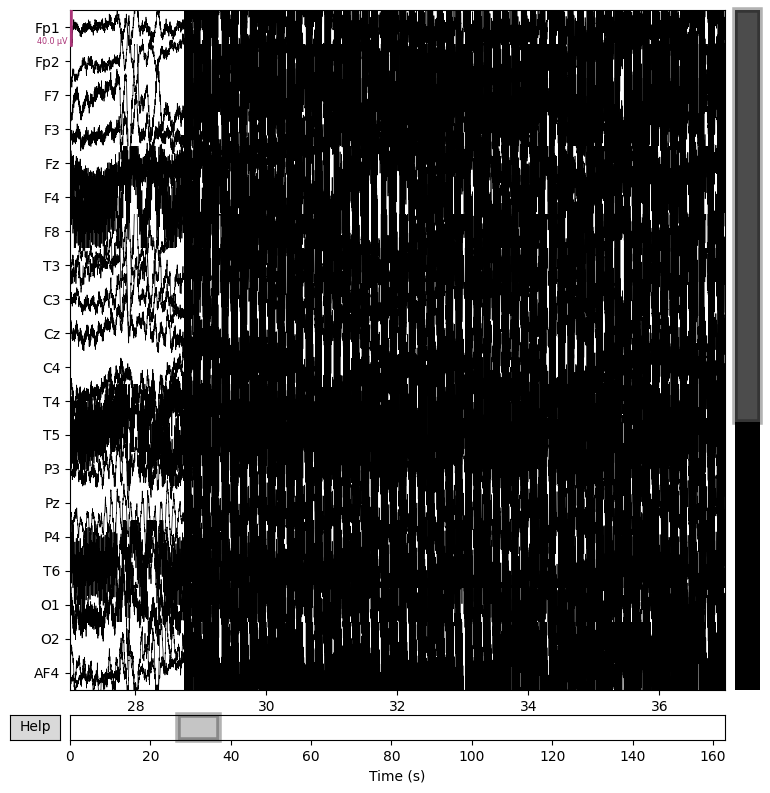

In [2]:
f.import_EEG(eegDataSet)
f.plot_EEG()

## Third Step Preprocessing

In [3]:
f.pre_processing()


Applying highpassfilter
Filtering raw data in 1 contiguous segment
Setting up high-pass filter at 1 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal highpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Filter length: 6759 samples (3.300 s)

Upsampling Data
840 events found
Event IDs: [1]


[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s


840 events found
Event IDs: [1]


## Fourth Step find triggers

In [4]:
f.find_triggers_with_events(r'\b1\b') # Using Niazys data
#f.cut()
#f.find_triggers_with_events(r'\b1\b',idx=1) # Using Niazys data

#f.find_triggers(r'.*TR.*') # Using Fischmeisters data

['Fp1', 'Fp2', 'F7', 'F3', 'Fz', 'F4', 'F8', 'T3', 'C3', 'Cz', 'C4', 'T4', 'T5', 'P3', 'Pz', 'P4', 'T6', 'O1', 'O2', 'AF4', 'AF3', 'FC2', 'FC1', 'CP1', 'CP2', 'PO3', 'PO4', 'FC6', 'FC5', 'CP5', 'EMG', 'ECG', 'Status']
840 events found
Event IDs: [1]
finding triggers


## Fourth step apply AAS

0.14794921875
tmin:  -0.01
tmax:  0.13794921875
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
Not setting metadata
840 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 840 events and 3031 original time points ...
0 bad epochs dropped
Epochs shape:  (840, 30, 3031)
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).


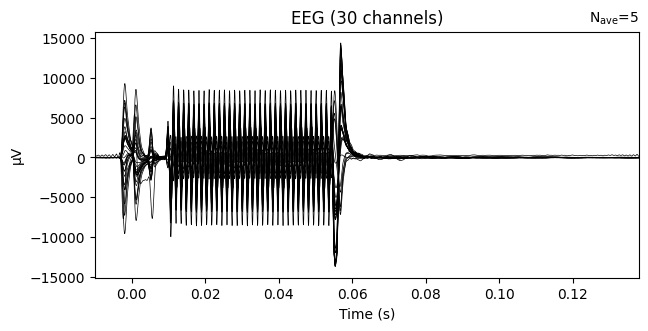

In [5]:
f.apply_MNE_AAS()

## Fifth step Remove Artifacts

In [6]:
f.remove_artifacts( )



: 

## Sixth step Post-Processing

In [ ]:
f.downsample()
f.plot_EEG()
f.lowpass(h_freq=50)

## Seventh display the processed eeg data

In [ ]:
f.plot_EEG()
f.export_EEG("NiazyFMRI_pyFacet_cleaned.edf")

f.import_EEG("NiazyFMRI_matlab_cleaned.edf")
f.plot_EEG()

## Eighth Evaluate Results

In [ ]:

f.init_evaluation_framework()
f.calculate_SNR()
